# Probability 2 (Data science Master, University of Lille) / CMF, (Centrale Lille, G3 SDIA)

---

## Lab 1 - Discrete time homogeneous Markov chains

---

## Guidelines (read carefully before starting)

**Objectives**: numerically simulate basic Markov chains (discrete time and discrete state space).

**Setup**: after retrieving the resources for the lab on moodle:
- place the .zip archive in a local folder (Computer -> Documents/Python/);
- unzip the archive .zip;
- rename the folder with the convention lab1_Name1_Name2
- duplicate the notebook file and rename it lab1_Name1_Name2.ipynb;
- [**optional, possibly needed if working from Centrale's machines**]
    - create a `lab1` conda environment from the provided `requirement.txt` file
    ```bash
    conda create --name=lab1 --file=requirement.txt
    conda activate lab1
    # do not forget to deactivate the environment if needed
    # you can remove the environment once you are done
    conda env remove --name=lab1
    ```
    - launch jupyter notebook (the python environment will be the one from the conda environment `lab1`)
- at the end of the session, do not forget to transfer your work to your own network space if you are working on a machine from the school (do not leave your work on the C: drive).

**Assessment** &#8594; grade /20 (possibly converted later on to a grade ranging from F to A (A+))

This lab session will be evaluated, based on your answer to the exercises reported in a Jupyter notebook (e.g., this one) and any additional `.py` file produced. In particular:

- make sure the notebook you produce is properly annotated: each exercise should be introduced by a short sentence summarizing its context. Concisely answer each question from the guideline. 
- **relate the numerical results to the theory covered during the lecture** whenever appropriate;
- **codes without any explanations (in a text cell) will not be considered as a complete answer**, and will only be attributed a fraction of the grade attributed to the question.
- any code produced should be commented whenever appropriate;
- include appropriate axis labels and a relevant title to each figure reported in the notebook;
- **document any function you introduce (using docstrings)**, and comment your code whenever appropriate (see, *e.g.*, [PEP 8 style recommendations](https://www.python.org/dev/peps/pep-0008/)). 
     - use a reference docstring style, *e.g.*, the [google docstring style](https://sphinxcontrib-napoleon.readthedocs.io/en/latest/example_google.html).
- **give a clear structure to your notebook**: longer theoretical explanations should be reported in markdown cells. Include LaTeX equations to improve the clarity of the document.

**Additional evaluation criteria**:
- Code clarity / conciseness / documentation
- Comment quality / overall presentation    

## <a name="content">Contents</a>
- [Exercise 1: Ehrenfest model](attachment:./#ex1)
- [Exercise 2: Simulation of a discrete time homogeneous Markov chain](attachment:./#ex2)

---
## <a name="ex1">Exercise 1: Ehrenfest model</a> [(&#8593;)](attachment:./#content) <!-- [$\cdot$/10] -->
 Consider a system of $K = 30$ particles (labeled from 1 to $K$) evolving in a closed box. The box is divided into two compartments in contact with each other, respectively identified by an index, $0$ and $1$. A hole at the interface between the two compartments allows the particles to move from one compartment to the other.

 Particle motion is modeled as follows: at each discrete time intant $n$, one particle is chosen uniformly at random and moved from its current compartment to the other. Let $X(n)$ denote the number of particles in compartment $0$ at time $n$.

1\. <!--[$\cdot$/0.5]--> Briefly justify that $\bigl(X(n) \bigr)_{n \in \mathbb{N}}$ is a Markov chain.

- Il s'agit bien d'un **processus à temps discret**, où $\bigl(X(n) \bigr)_{n \in \mathbb{N}}$ est une suite de variables aléatoires à valeurs dans l'ensemble d'états $S = \{0, 1, ... 30\}$ correspondant au nombre de particules pouvant se trouver dans le compartiment $0$ au pas de temps $n$.
- A chaque étape, le passage d'une particule d'un compartiment à l'autre de la boîte est indépendant des étapes précédentes, et donc le nombre de particules dans le compartiment $0$ ne dépend que du nombre de particules dans ce compartiment à l'étape précédente (**processus sans mémoire**).

Il s'agit donc bien d'une **chaîne de Markov**.

2\. <!--[$\cdot$/1.5]--> Is the chain irreducible? (Positive) recurrent? Aperiodic or periodic? Prove each statement from your answer (recall the main steps covered during the exercise session).

On étudie les probabilités de transition :
- si $X_0 = 0$, une particule passe nécessairement de $0$ à $1$
- si $X_0 = K$, une particule passe nécessairement de $1$ à $0$
- si $X_0 \in \{1, ..., K-1\}$
    - la probabilité de passage d'une particule de $0$ à $1$ est $\frac{j}{K}$ par hypothèse d'uniformité
    - de même, la probabilité de passage d'une particule de $1$ à $0$ est $1 - \frac{j}{K}$

Ainsi, on a : 
$$
\begin{cases}

\mathbb{P}(X_1 = 1 | X_0 = 0) = 1 \\
\mathbb{P}(X_1 = K-1 | X_0 = K) = 1 \\
\mathbb{P}(X_1 = j+1 | X_0 = j) = 1 - \frac{j}{K} & \text{si } j \notin \{ 0; K \}\\
\mathbb{P}(X_1 = j-1 | X_0 = j) = \frac{j}{K} & \text{si } j \notin \{ 0; K \}\\
\mathbb{P}(X_1 = j | X_0 = i) = 0 & \text{si } i \notin \{ j-1; j+1 \} \\

\end{cases}
$$

(Les probabilités de transition sont données pour le passage de $0$ à $1$ mais se généralisent par homogénéité de la chaîne.)

Ainsi, il existe un cycle avec probabilités positives joignant l'état $0$ à l'état $K$ passant par tous les états, et revenant en $0$ : la chaîne est **irréductible**.

La chaîne est également récurrente puisque l'espace d'états est fini et qu'elle n'admet aucun état absorbant.

De plus, on passe des sites pairs aux sites impairs en un pas de temps, et vice-versa : **la chaîne est périodique de période 2**.

3\. <!--[$\cdot$/0.5]--> Recall the structure of the transition matrix, and encode it in Python (without any for loop).

 > Hint: use the function `numpy.diag`.

D'après les probabilités établies à la question précédente, la matrice de transition a la forme suivante :
$$
\begin{bmatrix}
0            & 1     & 0      &  \ldots      & 0     & 0  \\
\frac{1}{K}  & 0 & \frac{K-1}{K} & \ddots &    & 0 \\
0            & \frac{2}{K} & \ddots & \ddots & \ddots & \vdots   \\
\vdots       & \ddots & \ddots & \ddots & \ddots & 0  \\
0            &        & \ddots & \ddots & \ddots & \frac{1}{K} \\
0            & 0      & \ldots      & 0     & 1      & 0
\end{bmatrix}
$$

In [76]:
import numpy as np

# Nombre de particules
K = 30

# Calcul de la sous-diagonale
diag_1 = (1/K)*np.arange(1, K+1)
    
# Calcul de la sur-diagonale : il s'agit simplement des coefficients de la sous-diagonale, mais pris dans "l'autre sens"
diag_2 = np.flip(diag_1)

# On crée la matrice de transisition on ajoute la sous-diagonale et la sur-diagonale à une matrice de zéros
P = np.zeros(shape=(K+1,K+1)) + np.diag(diag_1, k=-1) + np.diag(diag_2, k=1)

4\. <!--[$\cdot$/0.5]-->Numerically verify that the binomial distribution $\mathcal{B} (K, 1/2)$ is invariant for the chain. This invariant distribution will be denoted by $\pi$ in the rest of the exercise.

 > Hint: you can use `scipy.stats.binom`.

Nous allons vérifier numériquement que le vecteur $\pi$ correspondant à la distribution $\mathcal{B} (K, 1/2)$ vérifie : $\pi P = \pi$ : cela prouvera alors que la distribution en question est invariante.

In [77]:
from scipy.stats import binom


distrib_bin = binom(K, 0.5)

# Crée un array contenant les probabilités de la loi binomiale pour k allant de 0 à K
pi = distrib_bin.pmf(np.arange(0,K+1))

# Vérification numérique (on laisse une certaine tolérance pour les approximations numériques)
print(f"pi is equal to pi*P >> {np.all(pi.dot(P) - pi < 1e-15)}")

pi is equal to pi*P >> True


5\. <!--[$\cdot$/2]--> Implement a Python function `ehrenfest` to simulate a trajectory of the chain for a system of $K$ particles, for initial distribution $\mu$ (for instance a Dirac centered in $0$, meaning that the compartment $0$ is empty at $n = 0$). The maximum number of time steps will be controlled by an input parameter $n_{\max}$.

For an efficient implementation, **do not use vector-matrix product with the transition matrix implemented in 3**: rely on the description of the system instead.

Nous définissons une fonction `ehrenfest(K, n_max, rng)` dans un fichier annexe `lab1_functions.py`.

In [78]:
from lab1_functions import ehrenfest

6\. Simulate a trajectory of the chain starting in state $0$ for $n_{\max} = 5000$. Display the result in function of the time index $n$. Briefly describe the curve you obtained.

<StemContainer object of 3 artists>

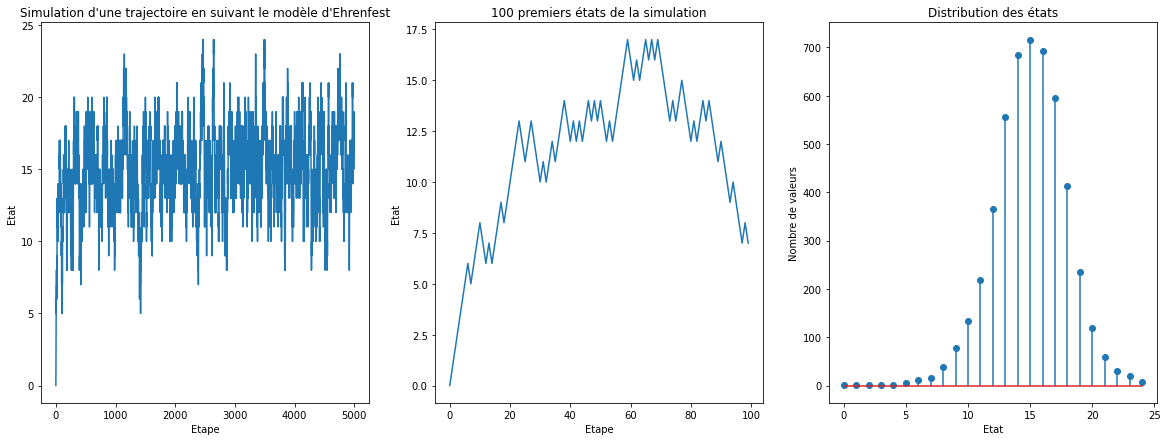

In [79]:
import matplotlib.pyplot as plt

rng = np.random.default_rng(seed=0)

n_max = 5000
simulation_states, T = ehrenfest(K, n_max, rng)
simulation_distrib = np.bincount(simulation_states.astype(int))

plt.figure(figsize=(20,7))

# Graphe complet
plt.subplot(131)
plt.title("Simulation d'une trajectoire en suivant le modèle d'Ehrenfest")
plt.xlabel("Etape")
plt.ylabel("Etat")
plt.plot(simulation_states)

# Seulement les premiers états pour avoir un graphe lisible
plt.subplot(132)
plt.title("100 premiers états de la simulation")
plt.xlabel("Etape")
plt.ylabel("Etat")
plt.plot(simulation_states[:100])

# Histogramme des états
plt.subplot(133)
plt.title("Distribution des états")
plt.xlabel("Etat")
plt.ylabel("Nombre de valeurs")
plt.stem(simulation_distrib)

Comme on peut s'y attendre au vu de la formulation du problème, les valeurs prises par $X_n$ se concentrent autour des valeurs "médianes" (entre 10 et 20). Nous verrons dans les questions suivantes que la distribution se rapproche en fait d'une distribution binomiale.

On remarque également que $X_n$ ne prend jamais de valeur supérieure à 25. Cela s'explique par la faible probabilité de ces valeurs dans la distribution limite (cf. question suivante), couplée au fait que l'on commence à l'état 0 (qui en est le plus éloigné).

7\. Compare the empirical histogram of the trajectory obtained in 5. to the theoretical limit distribution $\pi$. What do you observe?

On affiche sur la même figure la distribution empirique (normalisée) et la distribution binomiale théorique.

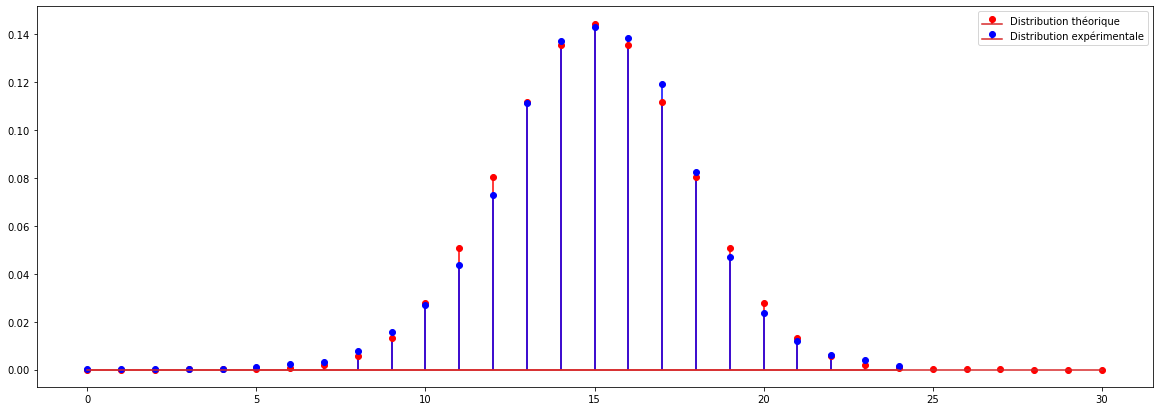

In [80]:
plt.figure(figsize=(20,7))
plt.title("Comparaison entre les distributions théorique et expérimentale")
plt.stem(pi, linefmt="red", markerfmt="ro")
plt.stem(simulation_distrib/n_max, linefmt="blue", markerfmt="bo") # On normalise la distribution expérimentale pour pouvoir la comparer à la distribution théorique
plt.legend(["Distribution théorique", "Distribution expérimentale"])
plt.show()

On observe effectivement que les distributions sont proches. Plus augmente la valeur de $n_max$, plus on fait tendre $n$ vers l'infini et plus la distribution empirique se rapproche de la distribution théorique.

8\. a) Modify the function defined in 1. so that it returns the return time to state 0, defined as $T_{0,0} = \inf \bigl\{ n > 0, X(n) = 0 \mid X(0) = 0 \bigr\}$.

Nous avons modifié la fonction directement dans le fichier `lab1_functions.py` pour qu'elle renvoie un entier correspondant au premier temps de retour en $0$.

In [81]:
print(f"Le temps de premier retour en 0 est de {T} itérations.")

Le temps de premier retour en 0 est de 0 itérations.


Dans la distribution théorique limite (loi binomiale de paramètres $K$, $\frac{1}{2}$), la probabilité de l'état $0$ vaut $\frac{1}{2^{K}} = \frac{1}{2^{30}}$ qui est de l'ordre de $10^{-10}$. Ce qui explique qu'en pratique, on n'observe pas de retour en $0$.

8\. b) [**Optional**] Run several chains (about 5, ideally in parallel) for $K = 10$, $n_{\max} = 5000$, and compare the empirical average of $T_{0,0}$ to $\pi(0)$. What do you observe?
 > Hint: a good tutorial showing how to run functions in parallel in Python is available [here](https://www.machinelearningplus.com/python/parallel-processing-python/).

In [82]:
# ...

8\. c) Comment on the possibility of numerically observing the chain returning to its initial state as $K$ increases.

Plus on augmente la valeur de K, plus la probabilité de revenir à l'état 0 est faible. Sachant que numériquement, on a $10^{-16} \approx 0$, il deviendra presque impossible d'observer empiriquement un temps de retour non nul.

---
## <a name="ex2">Exercise 2: Simulation of a discrete time homogeneous Markov chain</a> [(&#8593;)](attachment:./#content)
 Let $\bigl( X(n) \bigr)_{n \in \mathbb{N}}$ be a discrete time homogeneous Markov chain defined by the following initial distribution $\mu$ and transition matrix $P$

$$
     \mu = [0, 1, 0, 0, 0, 0], 
     %
     \quad
     %
     P = \begin{pmatrix}
       1/2   & 1/2 &0  &0   &0   &0   \\
	 	1/4 &0   &0  &1/4 &1/4 &1/4   \\
       1/2   &0   &0  &0   &0   &1/2 \\
       0   &1/2 &0  &0   &1/2 &0   \\
       0   &1/3 &0  &1/3 &0   &1/3 \\
       0   &1/3 &1/3  & 0 &1/3   &0
     \end{pmatrix}.
 $$

1\. What can you say about the Markov chain $X$? (irreducibility, positive recurrence, periodicity, ...). Justify each of your claim, citing the relevant results from the lecture.

- On peut facilement montrer que tous les états sont dans la même classe d'équivalence : il existe un chemin de probabilité non-nulle entre chacun d'entre eux. La chaîne de Markov est donc **irréductible**.
- La chaîne étant irréductible sur un espace d'états fini, elle est **récurrente positive**.
- La probabilité de rester dans l'état 1 quand on s'y trouve déjà est non-nulle : la chaîne est donc **apériodique** puisque l'on ne peut alors pas exhiber de partition de l'ensemble d'états telle que lorsque l'on est dans l'état 1, on est sûr de passer dans un autre élement de la partition.

2\. Write a function `simulate_dthmc` simulating the trajectory of the Markov chain $\bigl( X(n) \bigr)_{n \in \mathbb{N}}$ for $n_{\max}$ time steps. The signature of the function should include the following elements:
   - list of inputs: transition matrix $P$, initial distribution $\mu$, number of time steps $n_{\max}$;
   - output: array of lenght $n_{\max}$ representing the trajectory.
   
**To this end, do not use matrix vector products, which would lead to an extremely inefficient algorithm in this case.**
   

On programme la fonction dans le fichier annexe `lab1_functions.py`.
Pour le passage d'une étape à l'autre, notre implémentation utilise :
$$

\mathbb P(X_{k+1} = j | X_k = i) = p_{ij} 

$$

où $p_{ij}$ sont les coefficients de la matrice de transition. Autrement dit, on trouve la distribution de probabilités en lisant la ligne $i$ de $P$.

On utilise alors la fonction `numpy.random.choice` pour générer l'état suivant selon cette distribution.

In [83]:
from lab1_functions import simulate_dthmc

3\. Simulate a trajectory of the chain for $n_{\max} = 2000$ starting from $X(0) = 1$. Plot the histogram of the states visited by the chain.
 

In [84]:
# Définition des données
mu = np.array([0, 1, 0, 0, 0, 0])

P = np.array([
    [.5, .5, 0, 0, 0, 0],
    [.25, 0, 0, .25, .25, .25],
    [.5, 0, 0, 0, 0, .5],
    [0, .5, 0, 0, .5, 0],
    [0, 1/3, 0, 1/3, 0, 1/3],
    [0, 1/3, 1/3, 0, 1/3, 0],
])

n_max = 2000

rng = np.random.default_rng(seed=0)

In [85]:
# Simulation
X = simulate_dthmc(P, mu, n_max, rng)

<StemContainer object of 3 artists>

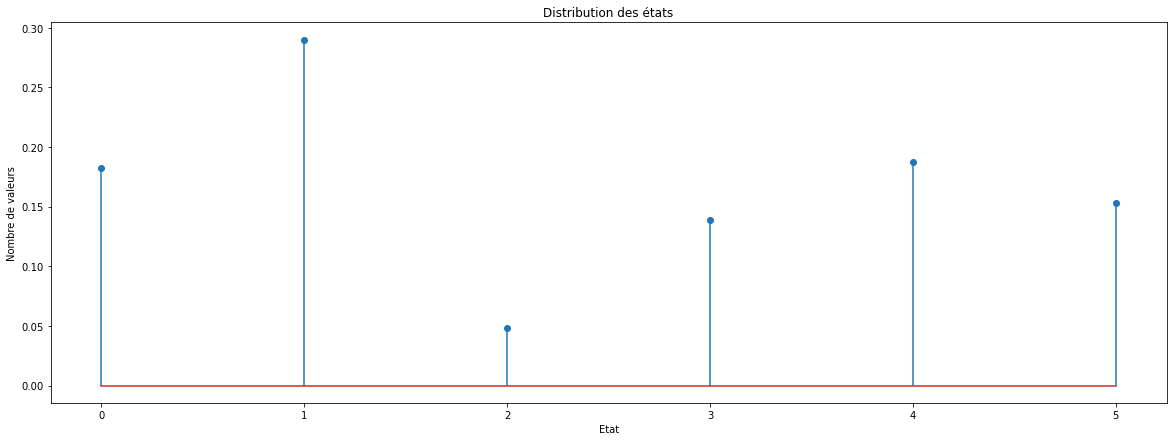

In [86]:
# Affichage de l'histogramme des états
X_distrib = np.bincount(X.astype(int)) 

plt.figure(figsize=(20,7))
plt.title("Distribution des états")
plt.xlabel("Etat")
plt.ylabel("Nombre de valeurs")
plt.stem(X_distrib/ n_max) # Normalisation

On observe que l'état le plus visité est l'état 1. En effet, on aurait pu intuiter ce résultat puisque de nombreux chemins mènent à cet état.

4\. Determine numerically an invariant distribution $\boldsymbol{\pi}$ of the chain (*e.g.*, based on an eigendecomposition [numpy.linalg.eig](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eig.html)). Is it unique? Compare it to the histogram obtained in 2 (superimpose graphs). What can you conclude?
 

Une mesure invariante $\pi$ vérifie :

$$
\pi P = \pi \iff P^T \pi = \pi
$$

Ainsi, une telle mesure est un vecteur propre de $P^T$ associé à la valeur propre $1$.

Nous commençons par récupérer les valeurs propres et les vecteurs propres de $P^T$ :

In [101]:
eigenvalues, eigenvectors = np.linalg.eig(P.T)
print(eigenvalues, eigenvectors)

[ 1.        +0.j          0.39993008+0.07605378j  0.39993008-0.07605378j
 -0.68534115+0.j         -0.35918796+0.j         -0.25533106+0.j        ] [[-0.43437468+0.j          0.73601336+0.j          0.73601336-0.j
   0.23113011+0.j          0.20208237+0.j          0.02066502+0.j        ]
 [-0.62909436+0.j          0.26071531-0.13859676j  0.26071531+0.13859676j
  -0.5440177 +0.j         -0.78905098+0.j          0.71535162+0.j        ]
 [-0.1198275 +0.j         -0.27766324+0.18125158j -0.27766324-0.18125158j
  -0.27592722+0.j          0.04727202+0.j         -0.38889367+0.j        ]
 [-0.29956874+0.j         -0.08105702-0.12829413j -0.08105702+0.12829413j
   0.36600636+0.j          0.01486539+0.j         -0.46365803+0.j        ]
 [-0.42688546+0.j         -0.26351614-0.06847255j -0.26351614+0.06847255j
  -0.34450439+0.j          0.57576983+0.j         -0.18135483+0.j        ]
 [-0.35948249+0.j         -0.37449226+0.15411186j -0.37449226-0.15411186j
   0.56731283+0.j         -0.05093862+0.j 

Le vecteur propre associé à la valeur propre 1 est donc donné par `eigenvectors[:, 0]` (la première colonne de la matrice dans la décomposition en éléments propres), dont toutes les composantes sont réelles. De plus, on normalise le vecteur obtenu afin d'avoir une probabilité invariante.

In [104]:
pi = eigenvectors[:, 0].astype(float) 
pi = pi / sum(pi) # Normalisation

C:\Users\saemi\AppData\Local\Temp/ipykernel_12336/2318795091.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  pi = eigenvectors[:, 0].astype(float)


Vérifions maintenant que l'on a bien la relation $\pi P = \pi$ :

In [105]:
print(f"pi is equal to pi*P >> {np.all(P.T.dot(pi) - pi < 1e-15)}")

pi is equal to pi*P >> True


On superpose la distribution théorique trouvée à la distribution empirique observée : 

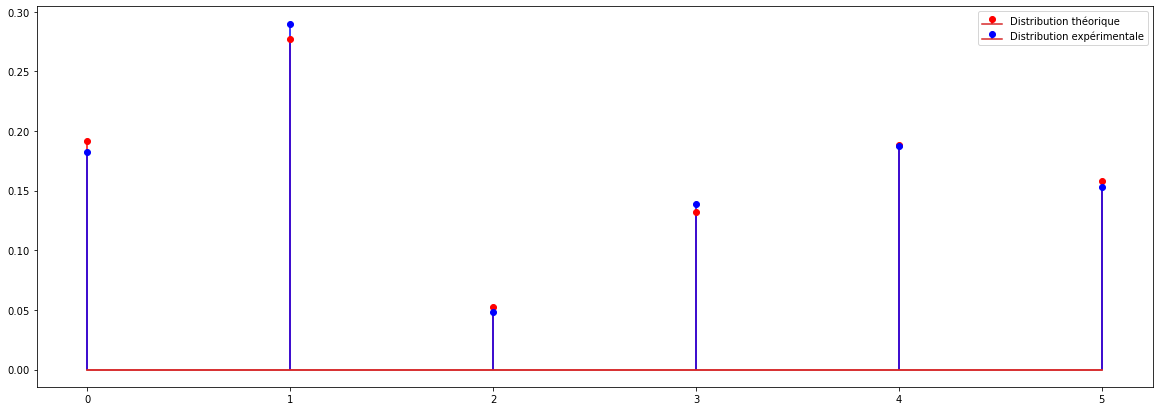

In [106]:
plt.figure(figsize=(20,7))
plt.title("Comparaison entre les distributions théorique et expérimentale")
plt.stem(pi, linefmt="red", markerfmt="ro")
plt.stem(X_distrib/n_max, linefmt="blue", markerfmt="bo")
plt.legend(["Distribution théorique", "Distribution expérimentale"])
plt.show()

On retrouve le résultat de cours : la chaîne de Markov étant irréductible, récurrente positive et apériodique, elle admet une unique probabilité invariante vers laquelle elle tend. 

5\. a) Compute $\mu_n \triangleq \mu P^n$, the probability distribution of $X(n)$. What is the limit of $\mu_n$ as $n$ goes to $+\infty$? Illustrate the result numerically.

D'après le résultat cité ci-dessus, la limite de $\mu_n$ est la probabilité invariante $\pi$.

Nous calculons donc numériquement les valeurs successives prises par $\mu_n$ afin de les comparer avec $\pi$ dans la question 5.b).

In [124]:
N = 20
time = np.arange(N)
mu_n = np.zeros((N, 6))
for n in time :
    mu_n[n] = mu.dot(np.linalg.matrix_power(P, n))


5\. b) Display on the same graph the curves $n \mapsto \mu_n(i)$ for $i = 1, \dotsc , 6$, and compare with $\pi$. Display on another graph the function $n \mapsto \Vert \mu_n - \pi \Vert_1$, where $\Vert \cdot \Vert_1$ is the $\ell_1$ norm. What does each of these curves illustrate?
  

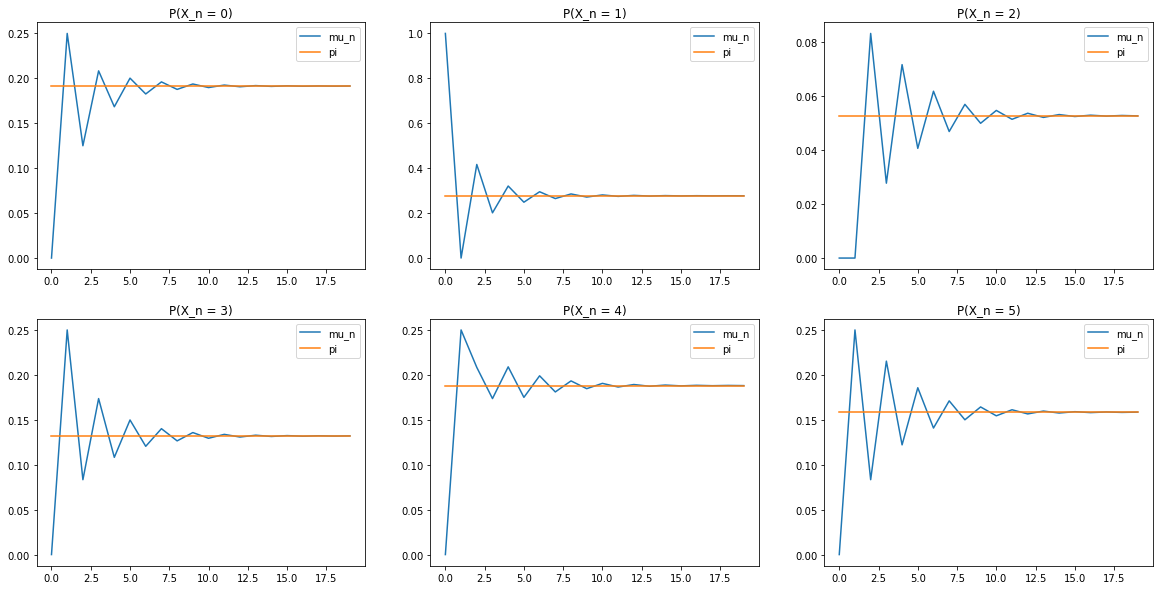

In [133]:
plt.figure(figsize=(20,10))

plt.subplot(231)
plt.title("P(X_n = 0)")
plt.plot(mu_n[:, 0])
plt.plot(np.ones(N)*pi[0])
plt.legend(["mu_n", "pi"])

plt.subplot(232)
plt.title("P(X_n = 1)")
plt.plot(mu_n[:, 1])
plt.plot(np.ones(N)*pi[1])
plt.legend(["mu_n", "pi"])

plt.subplot(233)
plt.title("P(X_n = 2)")
plt.plot(mu_n[:, 2])
plt.plot(np.ones(N)*pi[2])
plt.legend(["mu_n", "pi"])

plt.subplot(234)
plt.title("P(X_n = 3)")
plt.plot(mu_n[:, 3])
plt.plot(np.ones(N)*pi[3])
plt.legend(["mu_n", "pi"])

plt.subplot(235)
plt.title("P(X_n = 4)")
plt.plot(mu_n[:, 4])
plt.plot(np.ones(N)*pi[4])
plt.legend(["mu_n", "pi"])

plt.subplot(236)
plt.title("P(X_n = 5)")
plt.plot(mu_n[:, 5])
plt.plot(np.ones(N)*pi[5])
plt.legend(["mu_n", "pi"])

Comme on s'y attendait, on observe que $\mu_n$ tend vers $\pi$ lorsque n tend vers l'infini, soit ici lorsque n atteint des valeurs importantes.

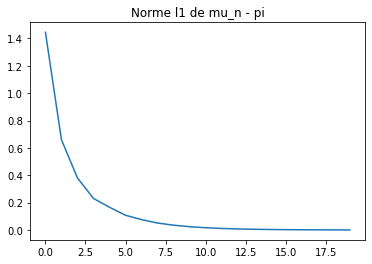

In [139]:
norm = np.linalg.norm(mu_n - pi, axis=1, ord=1) # Norme l1
plt.title("Norme l1 de mu_n - pi")
plt.plot(norm)

Les observations ci-dessus sont confirmées par cette dernière courbe.

6\. For each state $i \in \{1, \dotsc, 5 \}$, simulate 100 trajectories starting from the state $i$ until the return time to $i$. For each state, compute the (empirical) average return time. Compare with its theoretical value.
 